In [42]:
from Modeling import model
from mygp import gp, kernel
import numpy as np
import warnings
warnings.filterwarnings("ignore")

k1_params = [0.5, 10]
k2_params = [1, 5, 10]
white_noise = [10, 15, 20]
mean_params = [5, 1, 75]
offsets = [0, 10, 20]

def gauss(t, off, mean, sig, amp):
    return off + amp*np.exp(-((t - mean)**2)/(2*sig))

def box(t, off, mean, sig, amp):
    return off + amp*(np.abs(t - mean) < sig)

gauss_model = model(k1_params, k2_params, white_noise,
                    mean_params, offsets, gauss, 
                    kernel.exp_sq_kernel, kernel.scale_kernel, 3)
box_model = model(k1_params, k2_params, white_noise, 
                       mean_params, offsets, box, 
                      kernel.exp_sq_kernel, kernel.scale_kernel, 3)

In [43]:
t = np.linspace(0, 10, 100)
y1, y2, y3 = gauss_model.sample(t)

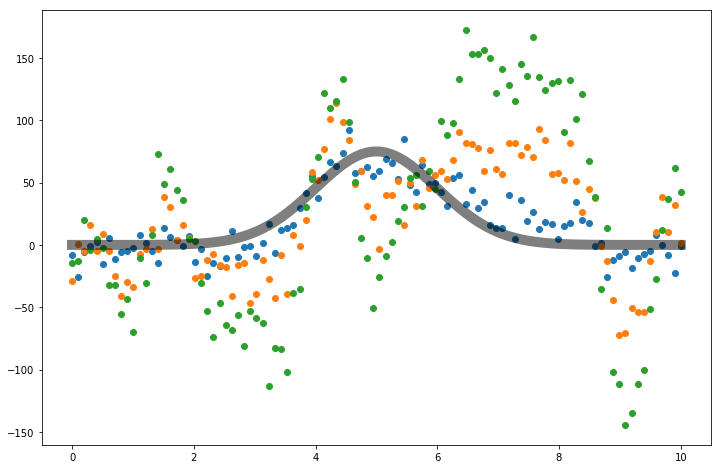

In [44]:
import matplotlib.pyplot as pl
%matplotlib inline

fig, ax = pl.subplots(figsize=(12, 8))

pl.plot(t, y1, 'o')
pl.plot(t, y2, 'o')
pl.plot(t, y3, 'o')
pl.plot(t, gauss(t, 0, *mean_params), linewidth=10, color='k', alpha=0.5)

In [45]:
n = 20
sig = np.linspace(0.01, 10, n)
amp = np.linspace(0, 150, n)
log_like_gauss = np.zeros((n, n))
log_like_box = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        mean_params = [5, sig[i], amp[j]]
        gauss_model.update_gp(mean_params=mean_params)
        box_model.update_gp(mean_params=mean_params)
        log_like_gauss[i][j] = -gauss_model.neg_log_like([y1, y2, y3], t)
        log_like_box[i][j] = -box_model.neg_log_like([y1, y2, y3], t)

In [46]:
k1_params = [1, 1]
k2_params = [1, 1, 1]
white_noise = [10, 10, 10]
mean_params = [5, 1, 50]
offsets = [0, 0, 0]

gauss_model.update_gp(k1_params=k1_params, k2_params=k2_params, 
                      mean_params=mean_params, white_noise=white_noise, 
                      offsets=offsets)
box_model.update_gp(k1_params=k1_params, k2_params=k2_params, 
                      mean_params=mean_params, white_noise=white_noise, 
                      offsets=offsets)

best_fit_gauss, BIC_gauss = gauss_model.fit([y1, y2, y3], t)
best_fit_box, BIC_box = box_model.fit([y1, y2, y3], t)

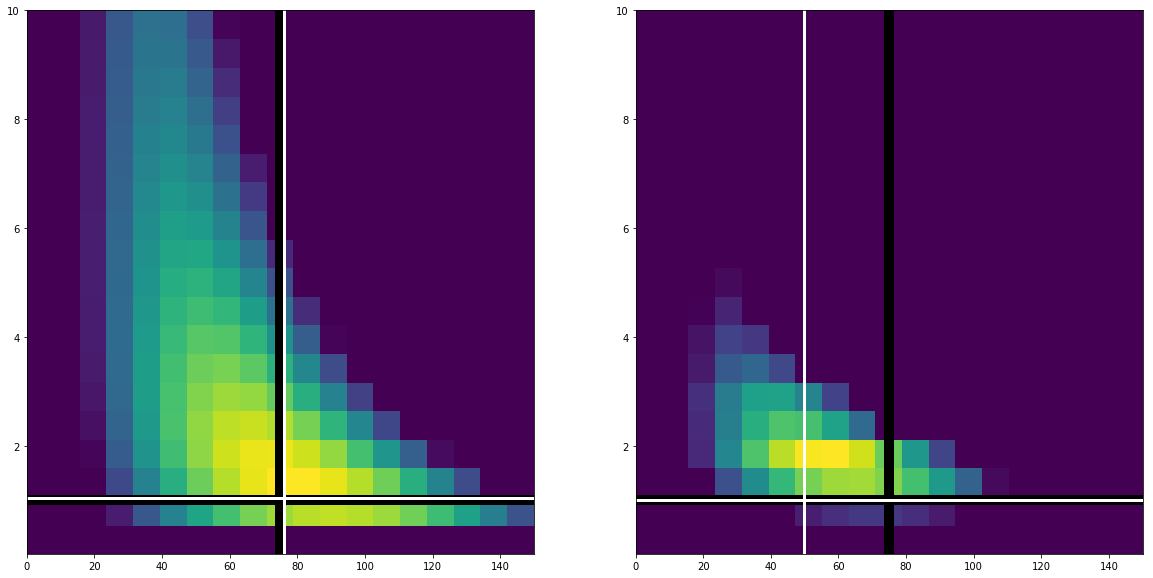

In [56]:
fig, axs = pl.subplots(1, 2, figsize=(20, 10))

axs[0].pcolormesh(amp, sig, log_like_gauss, vmin=-1500)
axs[0].axhline(1, color='k', linewidth=10)
axs[0].axvline(75, color='k', linewidth=10)
axs[0].axhline(gauss_model.mean_params[1], color='w', linewidth=3)
axs[0].axvline(gauss_model.mean_params[2], color='w', linewidth=3)

axs[1].pcolormesh(amp, sig, log_like_box, vmin=-1500)
axs[1].axhline(1, color='k', linewidth=10)
axs[1].axvline(75, color='k', linewidth=10)
axs[1].axhline(box_model.mean_params[1], color='w', linewidth=3)
axs[1].axvline(box_model.mean_params[2], color='w', linewidth=3)

delta BIC (box - gauss):  58.87283703037792


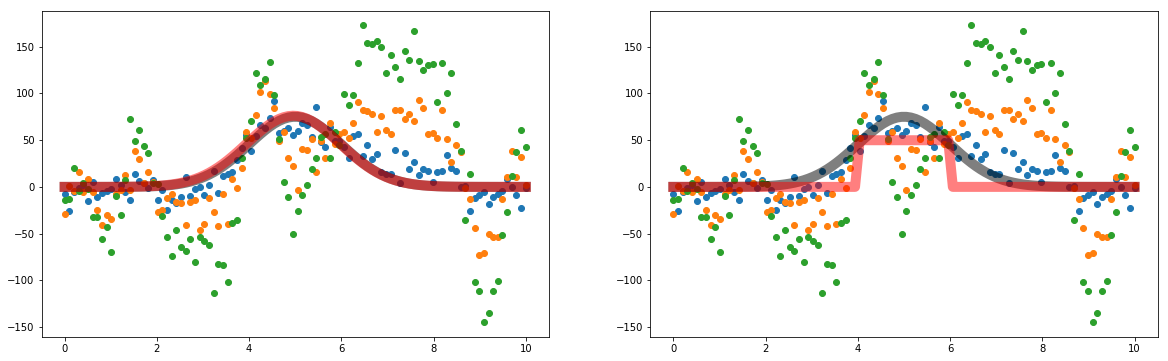

In [54]:
fig, axs = pl.subplots(1, 2, figsize=(20, 6))

axs[0].plot(t, y1, 'o')
axs[0].plot(t, y2, 'o')
axs[0].plot(t, y3, 'o')
axs[0].plot(t, gauss(t, 0, 5, 1, 75), linewidth=10, color='k', alpha=0.5)
axs[0].plot(t, gauss(t, 0, *gauss_model.mean_params), linewidth=10, color='r', alpha=0.5)

axs[1].plot(t, y1, 'o')
axs[1].plot(t, y2, 'o')
axs[1].plot(t, y3, 'o')
axs[1].plot(t, gauss(t, 0, 5, 1, 75), linewidth=10, color='k', alpha=0.5)
axs[1].plot(t, box(t, 0, *box_model.mean_params), linewidth=10, color='r', alpha=0.5)

print('delta BIC (box - gauss): ', BIC_box-BIC_gauss)

- How to compute the evidence
    - It must be done from mcmc - not enough probability at grid points to integrate